# hmjr is a package of tools to help researchers as well as users with simpler needs directly interact with the HMJr diary collection.

- <https://github.com/TeddyRandby/hmjrPyTools/blob/main/README.md>


<img src="Images/header_count.png"/> 
<img src="Images/volume_count.png"/> 
<img src="Images/word_count.png"/>

# Getting started

To install our package and import what you need, run the following two lines.

In [ ]:
# Install the package that let's us analyze the JSON DB
!pip install hmjr===0.1.0


Query here is the first point of contact for interacting with the HMJR Diary database. In order to use it, we need to initialize the object. Don't worry about what that means behind the scenes, just make sure to follow Query up with a () whenver we use it, like this: Query().

At this point, you may be seeing some suggestions popping up, especially if you're using a Notebook. The best starting point here is just run(), which just grabs entries in the simplest way possible, just the order they happen to be stored in the database.

So for now, we'll go with that.

In [ ]:
from hmjr import Query
import matplotlib.pylab as plt
import numpy as np
import datetime

Query().run(max=5).entries

.entries selects the data the query gave us out of the Queries object. And after running that, you should see the data output!

Before we get to some new queries, lets go over some of the ways we can influence the queries we make. One way is with the default argument max. It refers to the maximum number of entries the query should ask for. This can be changed like this:

In [ ]:
Query().run(max=5).entries

This time we should see a lot fewer entries when we run the query.

Speaking of volumes - lets move on to a more complex query.

In [ ]:
Query().withBookBetween(1,5).run().entries

This query should be self explanatory, but it does have a quirk in that the book range includes the lower bound, and excludes the upper bound. So this query will return entries with books 1, 2, 3, 4.

Under the hood, withBookBetween(start,stop) uses a different function to query the database, and that function is simply withBook(). It works like this:

In [ ]:
Query().withBook([1,2,3,4]).run().entries

This is the query our previous withBookBetween(1,5) generated for us. The brackets hold a list of book numbers, and they don't have to be in any order. [1,2,3,4] is the same as [2,4,1,3], and it could even be something like [708,1,66].

By the way, all these queries share that default argument max. Its used the same way that we saw earlier.

Heres our next query:

In [ ]:
Query().withKeywords(["Refugee", "refugee"]).run().entries

We see another list, which works the same way as our previous list. This time we have quotes around words to differentiate them from code - don't forget the quotes. If you get a syntax error, that might be why.

Heres the last kind of query we can do:

In [ ]:
Query().withDates({"day": 1, "month": 1, "year":44}).run().entries


Earlier we saw a python list with the square brackets, this notation is called a dictionary, and it holds any number of key:value pairs. Here, our query expects a dictionary with day, month and year keys.

Now that we've got all the queries working individually, we can combine them before we use run().

Try something like:

In [ ]:
Query().withKeywords(["Camp", "camp"]).withBookBetween(738, 349).run().entries


We've dropped the .entries off the end of our query, and are storing the result of run() in the variable entries. This result has more to it than just a list of entries. We can call a couple methods on this object. Heres what it looks like:


In [ ]:
entries.associate(["HMJr"])

What the associate() method does is take a list of words, and rank the appearences of every other word in proximity to this word. "Proximity" is defined as appearing with at least one of the given words in the content of an Index.

There are two more methods for analyzing the data: the deltaTime() method and the deltaBooks() method.

They work just like the associate() method, taking a list of words. They both return a dictionary which counts the appearences of the words over the books or over the dates in the entries.

There are some additional helper methods, such as:

- headerCounts() counts the occurences of each unique header in the entries
- headerWords() returns a dictionary counting the unique words in the headers
- contentWords() returns a dictionary counting the unique words in the content
- words returns the combination of headerWords() and contentWords()
- headers() returns an array of the header strings in the entries, not sorted
- content() returns an array of the content strings in the entries, not sorted
- dates() returns an array of the date dictionaries in the entries, not sorted
- indexes() returns an array of the index dictionaries in the entries, not sorted
- dateRange() returns the tuple (minimumDate, maximumDate) mentioned in the entries
- bookRange() returns the tuple (minimumBook, maximumBook) mentioned in the entries

In [ ]:
# Get the entries with a maximum of 2K entries, and save them in the entries variable.
#entries = Query().withBookBetween(696,697).run(max=2000)
entries = Query().withBook([696]).run()
numEntries = len(entries.content())
print("Number of entries: " + str(numEntries))
print("Avg entries per volume: " + str(numEntries / 1))

In [ ]:
entries.headers()[27]

Your results should have entries with "Camp" or "camp" in their text, in a volume between 738 and 749.

Now we can make complex queries on the data, lets look at how we can analyze it.

After we use the run() method, we get a different object back.

In [ ]:
from hmjr import Query
import matplotlib.pylab as plt
import numpy as np
import datetime
#import stanza
#stanza.download('en')
#nlp = stanza.Pipeline("en", processors='tokenize,ner', ner_model_path='en_hmjr_nertagger.pt')
import json
# Import the Query, and some other tools to help analysis

In [ ]:
# Make a query for entries with book between 689 and 749 (excluding 749)
# Take a maximum of 20K entries
# Count the occurrences of unique headers amoung these headers
data = Query().withBookBetween(688,699).run(max=20000)
#for entry in data.entries:
#  content = entry["header"] + " " + entry["content"]
#  content = content.replace('\n', '.')
#  doc = nlp(content)
#  for sent in doc.sentences:
#    for ent in sent.ents:
#      print(ent)

In [ ]:
# Get the same entries, but there is no max given. This uses the default, which is 50.

#query = """
#    query ($max: Float!, $keywords: [String!]!, $dates: [DateInput!]!, $books: [String!]!) {
#        entries(max: $max, keywords: $keywords, dates: $dates, books:$books) {
#            _id
#            header
#            content
#            people
#            locations
#            organizations
#            book
#        }
#    }
#"""
#mutation = """
#mutation ($id: String!, $entry: EntryInput!) {
#                updateEntry(id: $id, entry: $entry) {
#                    book
#                }
#            }
#"""

#entries = Query().query(query, {"max": 30000, "keywords": [], "dates": [], "books": ["689"]})
#for entry in entries.entries:
#  content = entry["header"] + " " + entry["content"]
#  content = content.replace('\n', '.')
#  doc = nlp(content)
#  people = [ent.text for sent in doc.sentences for ent in sent.ents if ent.type == "PERSON"]
#  locations = [ent.text for sent in doc.sentences for ent in sent.ents if ent.type == "LOC" or ent.type == "GPE"]
#  organizations = [ent.text for sent in doc.sentences for ent in sent.ents if ent.type == "ORG"]
#  vars = { "id": entry["_id"], "entry":{ "people": people, "locations": locations, "organizations": organizations }}
#  Query().query(mutation, vars, "updateEntry")


In [ ]:
Query().withDates({"day": 26, "month": 1, "year":44}).run().entries

In [4]:
# Get the entries with a maximum of 2K entries, and save them in the entries variable.
entries = Query().withBookBetween(689,749).run(max=2000)
numEntries = len(entries.content())
print("Number of entries: " + str(numEntries))
print("Avg entries per volume: " + str(numEntries / 60))

Number of entries: 1925
Avg entries per volume: 32.083333333333336


In [ ]:
entries = Query().withKeywords(["Camp", "camp"]).withBookBetween(738, 749).run()
entries.associate(["HMJr"])

In [ ]:
entries.headers()

In [ ]:
entries.content()

In [ ]:
entries.headerCounts()

In [ ]:
entries.dates()

In [ ]:
entries.indexes()

No handles with labels found to put in legend.


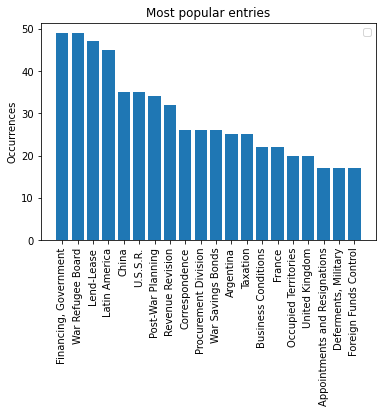

In [5]:
# Get the count of unique headers
data = entries.headerCounts()
# Sort the headers by their occurrence
lists = sorted(data.items(), key=lambda x: x[1], reverse=True)[:20]
# Transform the sorted headers into two lists, X and Y values
X, Y = map(list, zip(*lists))
# Plot them!
plt.bar(X, Y)
plt.xticks(rotation='vertical')
plt.legend()
plt.ylabel("Occurrences")
plt.title("Most popular entries")
plt.show()


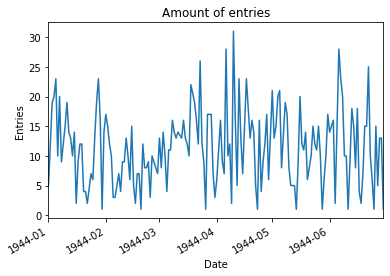

In [6]:
data = entries.dates()
invalid = [[d for d in data if d["month"] < 1 or d["month"] > 12]]
# Clean the data to only take dates with valid months
data = [d for d in data if d["month"] > 0 and d["month"] < 13]
# Transform the dates from the query into datetime objects
dates = [datetime.date(int("19" + str(d["year"])), d["month"], d["day"]) for d in data]

#Plot the occurrences of each individual date
fig, ax = plt.subplots()
plt.xlim(datetime.date(1944,1,1),datetime.date(1944,6,30))
unique, counts = np.unique(dates, return_counts=True)

plt.plot(unique,counts)
plt.title("Amount of entries")
plt.ylabel("Entries")
plt.xlabel("Date")
# rotate and align the tick labels so they look better
fig.autofmt_xdate()

In [7]:
# Get all the words that cooccurr with "HMJr" or "HMJT", and arent in stopWords
stopWords  = "of and to for Book Page page in by on from with See a) 1) b) also - be, New York York: as at Oswego Oswego,"
keyword = "Oswego"
data = entries.associate([keyword], stopWords)

# Sort these by occurrence, and take the top 10
lists = sorted(data.items(), key=lambda x: x[1], reverse=True)[:5]

# For each of these words, track their occurrence in the entries over volumes
for w in lists:
  # Get the word
  label = w[0]
  # Track it over volumes
  wOverTime = entries.deltaBooks(label)
  # Sort this by volume
  ordered = sorted(wOverTime.items(), key=lambda vol:vol[0])
  # Make x and y lists out of the sorted values
  x, y = zip(*ordered)
  # Plot this line
  plt.plot([int(i) for i in x], y, label=label, linewidth=1, alpha=0.5)


plt.title("5 most associated words with " + keyword + ", over volumes")
plt.ylabel("Occurrences")
plt.xlabel("Volume")
plt.legend()
plt.show()

No results found. Try running a query first.


AttributeError: 'NoneType' object has no attribute 'any'